In [4]:
import warnings
warnings.simplefilter('ignore')
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

## Data Processing
# from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# visualization
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

## Data Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
## Machine Learning Algorithms
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [3]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [112]:
from IPython.display import Audio
# signal = np.random.random(750)
# play = Audio(signal, autoplay=True, rate=250)
# play

In [5]:
sample = pd.read_csv('~/Documents/Flatiron_ds/sampleSubmission.csv')
testdf = pd.read_csv('~/Documents/Flatiron_ds/train_data.csv')
traindf = pd.read_csv('~/Documents/Flatiron_ds/test_data.csv')
# mixed up

In [9]:
# traindf.drop("Unnamed: 0", axis=1, inplace=True)
traindf.drop("index", axis=1, inplace=True)
# testdf.drop("Unnamed: 0", axis=1, inplace=True)

In [11]:
train_df = pd.DataFrame(data=testdf)
# train_df.drop(['StandardHours'], axis=1, inplace=True)
# testdf.drop(['StandardHours'], axis=1, inplace=True)

In [24]:
train_df.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [13]:
train_df.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,40,Travel_Rarely,Research & Development,2,3,Medical,Male,Research Director,Single,47750,3.0,15,1,15.0,3,5,1,0,1
1,31,Travel_Rarely,Research & Development,28,4,Technical Degree,Female,Sales Executive,Married,127420,1.0,11,0,10.0,4,10,0,2,0
2,35,Travel_Frequently,Research & Development,3,3,Medical,Female,Laboratory Technician,Married,22580,1.0,11,1,2.0,2,2,2,2,0
3,33,Travel_Rarely,Research & Development,2,2,Medical,Male,Sales Executive,Single,24400,0.0,18,3,4.0,4,3,0,2,0
4,32,Travel_Rarely,Research & Development,2,3,Medical,Male,Research Scientist,Married,57470,1.0,13,0,8.0,0,8,0,7,0


In [14]:
train_df.shape

(2205, 19)

In [15]:
testdf.shape

(2205, 19)

In [17]:
# Remove NAs

In [16]:
train_df.isnull().sum()

Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         11
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           6
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64

In [17]:
train_median = train_df.median()
train_df.fillna(train_median, inplace=True)

In [18]:
train_df.isnull().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Attrition                  0
dtype: int64

In [28]:
train_df = pd.get_dummies(train_df, prefix_sep='_', drop_first=True)

In [29]:
train_df.info()
print('_'*40)
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 33 columns):
Age                                  2205 non-null int64
DistanceFromHome                     2205 non-null int64
Education                            2205 non-null int64
MonthlyIncome                        2205 non-null int64
NumCompaniesWorked                   2205 non-null float64
PercentSalaryHike                    2205 non-null int64
StockOptionLevel                     2205 non-null int64
TotalWorkingYears                    2205 non-null float64
TrainingTimesLastYear                2205 non-null int64
YearsAtCompany                       2205 non-null int64
YearsSinceLastPromotion              2205 non-null int64
YearsWithCurrManager                 2205 non-null int64
Attrition                            2205 non-null int64
BusinessTravel_Travel_Frequently     2205 non-null uint8
BusinessTravel_Travel_Rarely         2205 non-null uint8
Department_Research & Development 

In [30]:
train_df.shape

(2205, 33)

In [31]:
train_df['Attrition'].value_counts().sort_index()

0    1849
1     356
Name: Attrition, dtype: int64

In [32]:
round(train_df['Attrition'].value_counts(normalize=True), 2)

0    0.84
1    0.16
Name: Attrition, dtype: float64

In [ ]:
# SMOTE

In [28]:
sample.describe()

,index,Attrition
count,2205.000000,2205.000000
mean,1102.000000,0.152695
std,636.672993,0.150216
min,0.000000,0.003568
25%,551.000000,0.055544
50%,1102.000000,0.098652
75%,1653.000000,0.193849
max,2204.000000,0.863295


In [26]:
traindf.drop_duplicates(inplace=True)

In [27]:
traindf.describe().T

,count,mean,std,min,25%,50%,75%,max
index,2205.0,1102.000000,636.672993,0.0,551.0,1102.0,1653.0,2204.0
Age,2205.0,37.177778,9.182865,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,2205.0,8.975510,8.071613,1.0,2.0,7.0,13.0,29.0
Education,2205.0,2.930159,1.001189,1.0,2.0,3.0,4.0,5.0
MonthlyIncome,2205.0,64906.653061,46427.509701,10090.0,29360.0,49600.0,83800.0,199990.0
NumCompaniesWorked,2197.0,2.741010,2.506606,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,2205.0,15.209524,3.680601,11.0,12.0,14.0,18.0,25.0
StandardHours,2205.0,8.000000,0.000000,8.0,8.0,8.0,8.0,8.0
StockOptionLevel,2205.0,0.765533,0.827658,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,2202.0,11.335604,7.667351,0.0,6.0,10.0,15.0,40.0


In [62]:
sample.head()

,index,Attrition
0,0,0.479141
1,1,0.059011
2,2,0.169789
3,3,0.094672
4,4,0.050951


In [39]:
train_df.columns

Index(['Age', 'DistanceFromHome', 'Education', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

In [55]:
# Check Outliers
from scipy import stats
# sns.boxplot(data=train_df['MonthlyIncome'])
train_data = train_df[(np.abs(stats.zscore(train_df)) < 2.5).all(axis=1)]

In [57]:
# def MD_detectOutliers(dist, extreme=False, verbose=False):
#     k = 3. if extreme else 2.
#     threshold = np.mean(dist) * k
#     outliers = []
#     for i in range(len(dist)):
#         if dist[i] >= threshold:
#             outliers.append(i)
#     return np.array(outliers)

In [66]:
# Preprocessing: StandardScaler
ss = StandardScaler()

scaled = pd.DataFrame(ss.fit_transform(train_df))
scaled.set_index(train_df.index, inplace=True)
scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.366904,-0.911101,0.099732,-0.364813,0.142746,-0.057601,0.203289,0.479304,0.153667,-0.332107,...,-0.187647,-0.473624,-0.259383,-0.324443,4.636809,-0.515545,-0.537327,-0.245145,-0.901844,1.440595
1,-0.624680,2.285949,1.055857,1.305381,-0.662252,-1.157258,-0.940210,-0.154841,0.915098,0.466994,...,-0.187647,-0.473624,-0.259383,-0.324443,-0.215666,-0.515545,1.861065,-0.245145,1.108839,-0.694158
2,-0.183976,-0.788137,0.099732,-0.892475,-0.662252,-1.157258,0.203289,-1.169472,-0.607763,-0.811568,...,-0.187647,2.111379,-0.259383,-0.324443,-0.215666,-0.515545,-0.537327,-0.245145,1.108839,-0.694158
3,-0.404328,-0.911101,-0.856393,-0.854320,-1.064751,0.767142,2.490285,-0.915814,0.915098,-0.651748,...,-0.187647,-0.473624,-0.259383,-0.324443,-0.215666,-0.515545,1.861065,-0.245145,-0.901844,1.440595
4,-0.514504,-0.911101,0.099732,-0.161044,-0.662252,-0.607430,-0.940210,-0.408498,-2.130623,0.147354,...,-0.187647,-0.473624,-0.259383,-0.324443,-0.215666,1.939696,-0.537327,-0.245145,1.108839,-0.694158


In [67]:
scaled.columns = train_df.columns

array([False, False,  True, ..., False,  True,  True])

In [75]:
# Remove Outliers
new_train = train_df[(np.abs(stats.zscore(train_df)) < 3).all(axis=1)]

In [76]:
new_train.shape

(1276, 33)

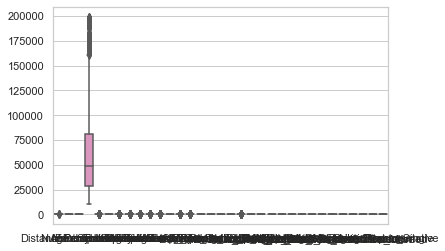

In [81]:
sns.boxplot(data=new_train, palette='Set2')

In [82]:
X = new_train.drop('Attrition', axis=1)
y = new_train['Attrition']

In [83]:
# Train, Test Split with stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=1, stratify=y)

In [84]:
X_train.shape

(893, 32)

## Find MVP

### Decision Tree

In [136]:
# Vanilla  
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dt_acc = round(dtc.score(X_train, y_train),3)
dt_acc

1.0

Decision Tree on train data

In [130]:
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4, random_state=42)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, y_train_fold  = X_train.iloc[train_index], y_train.iloc[train_index]
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train_fold, y_train_fold)
    X_test_fold, y_test_fold = X_train.iloc[test_index], y_train.iloc[test_index]
    dtc_pred = dtc.predict(X_train_fold)
    dt_accur = dtc.score(X_test_fold, y_test_fold)

In [115]:
# print(recall_score(y_train_fold, dtc_pred)

NameError: name 'y_test_fold' is not defined

In [ ]:
# Decision Tree visual


Overfitting? Let's try pruning

In [137]:
# DT Pruning
from sklearn.metrics import roc_curve, auc

# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=12,
                           max_depth=4,
                           min_samples_split=0.7,
                           min_samples_leaf=0.25, 
                           random_state=1)
dt.fit(X_train, y_train)
y_hat_train = dtc.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8292332268370607

### Random Forest

In [138]:
# Vanilla
rf = RandomForestClassifier()

rf.fit(X_train,y_train)
rf_acc = round(rf.score(X_train,y_train),3)
rf_acc
# Overfitting - add kFold

0.985

In [129]:
# kFold with RF
from sklearn.model_selection import StratifiedKFold

rfk = StratifiedKFold(n_splits=4, random_state=42)
for train_index, test_index in rfk.split(X_train, y_train):
    X_train_fold, y_train_fold  = X_train.iloc[train_index], y_train.iloc[train_index]
    rf = RandomForestClassifier()
    rf.fit(X_train_fold, y_train_fold)
    X_test_fold, y_test_fold = X_train.iloc[test_index], y_train.iloc[test_index]
    rf_pred = rf.predict(X_train_fold)
    rf_accur = rf.score(X_test_fold, y_test_fold)

### Logistic Regression

In [139]:
# Vanilla 
log = LogisticRegression()

log.fit(X_train,y_train)
# Y_pred = logreg.predict(X_test)
lr_acc = round(log.score(X_train,y_train),3)
lr_acc
# Overfitting - add kFold

0.819

In [125]:
from sklearn.model_selection import StratifiedKFold

lrk = StratifiedKFold(n_splits=4, random_state=42)
for train_index, test_index in lrk.split(X_train, y_train):
    X_train_fold, y_train_fold  = X_train.iloc[train_index], y_train.iloc[train_index]
    lr = LogisticRegression()
    lr.fit(X_train_fold, y_train_fold)
    X_test_fold, y_test_fold = X_train.iloc[test_index], y_train.iloc[test_index]
    lr_pred = lr.predict(X_train_fold)
    print(lr.score(X_test_fold, y_test_fold))

0.8169642857142857
0.8169642857142857
0.8161434977578476
0.8198198198198198


### SVM

In [140]:
from sklearn.svm import SVC, LinearSVC
sv = SVC()

sv.fit(X_train,y_train)
sv_acc = round(sv.score(X_train,y_train),3)
sv_acc
# Overfitting - add kFold

1.0

In [128]:
from sklearn.model_selection import StratifiedKFold

svk = StratifiedKFold(n_splits=4, random_state=42)
for train_index, test_index in svk.split(X_train, y_train):
    X_train_fold, y_train_fold  = X_train.iloc[train_index], y_train.iloc[train_index]
    sv = SVC()
    sv.fit(X_train_fold, y_train_fold)
    X_test_fold, y_test_fold = X_train.iloc[test_index], y_train.iloc[test_index]
    sv_pred = sv.predict(X_train_fold)
    sv_accur = sv.score(X_test_fold, y_test_fold)

### Naive Bayes

In [141]:
# Gaussian Naive Bayes
nb = GaussianNB()

nb.fit(X_train,y_train)
nb_acc = round(nb.score(X_train,y_train),3)
nb_acc
# Decent score

0.768

In [143]:
from sklearn.model_selection import StratifiedKFold

nvk = StratifiedKFold(n_splits=4, random_state=42)
for train_index, test_index in nvk.split(X_train, y_train):
    X_train_fold, y_train_fold  = X_train.iloc[train_index], y_train.iloc[train_index]
    nv = GaussianNB()
    nv.fit(X_train_fold, y_train_fold)
    X_test_fold, y_test_fold = X_train.iloc[test_index], y_train.iloc[test_index]
    nv_pred = nv.predict(X_train_fold)
    nb_accur = nv.score(X_test_fold, y_test_fold)

### XGBoost

In [142]:
xg = xgb.XGBClassifier()

xg.fit(X_train,y_train)
xg_acc = round(xg.score(X_test,y_test),3)
xg_acc

0.841

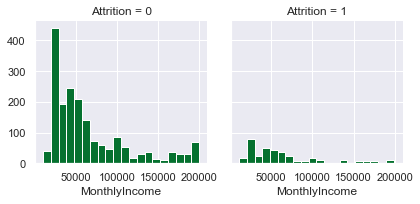

In [78]:
sns.set(context='notebook',style='darkgrid')
sns.set_palette('BuGn_r')
g = sns.FacetGrid(traindf, col='Attrition')
g.map(plt.hist, 'MonthlyIncome', bins=20)

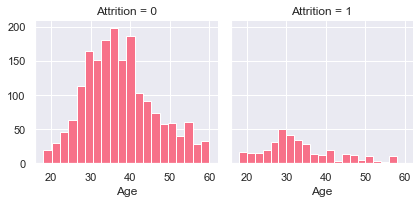

In [24]:
sns.set(context='notebook',style='darkgrid')
sns.set_palette('husl')
g = sns.FacetGrid(traindf, col='Attrition')
g.map(plt.hist, 'Age', bins=20)

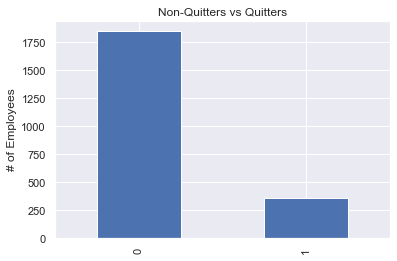

In [81]:
traindf.Attrition.value_counts().plot(kind='bar')
sns.set_palette('deep')
plt.title('Non-Quitters vs Quitters')
plt.ylabel('# of Employees')
plt.show()

In [30]:
# Target variable is Imbalanced
# SMOTE

In [16]:
# X_train.drop(['Gender'], axis=1, inplace=True)

In [90]:
.shape

(2205, 33)

In [88]:
# testdf.drop(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus'], axis=1, inplace=True)
testdf.columns

Index(['index', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [86]:
# checking accuracy
print('Test Accuracy score: ', accuracy_score(testdf, dummy_pred))
# checking accuracy
print('Test F1 score: ', f1_score(testdf, dummy_pred))
# checking recall
print('Test Recall score: ', recall_score(testdf, dummy_pred))
# checking precision
print('Test Precision score: ', precision_score(testdf, dummy_pred))


# Confusion Matrix
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(dummy, classes=[0,1])

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
# cm.poof()

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
def evaluation(y, y_hat, title = 'Confusion Matrix'):
    '''takes in predicted and true values.
    The function then prints out a classifcation report
    as well as a confusion matrix using seaborn's heatmap.'''
    
    import seaborn as sns
    cm = confusion_matrix(y, y_hat)
    precision = precision_score(y, y_hat, average = 'weighted')
    recall = recall_score(y, y_hat, average = 'weighted')
    accuracy = accuracy_score(y,y_hat)
    print(classification_report(y, y_hat))
    print('Accuracy: ', accuracy)
    sns.heatmap(cm,  cmap= 'Greens', annot=True)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.title(title)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline 

def create_plot_of_feature_importances(model, X):
    ''' 
    Inputs: 
    
    model: A trained ensemble model instance
    X: a dataframe of the features used to train the model
    '''
    
    feat_importances = model.feature_importances_

    features_and_importances = zip(X.columns, feat_importances)
    features_and_importances = sorted(features_and_importances, 
                                     key = lambda x: x[1], reverse=True)
    
    features = [i[0] for i in features_and_importances]
    importances = [i[1] for i in features_and_importances]
    
    plt.figure(figsize=(10, 6))
    plt.barh(features, importances)
    plt.gca().invert_yaxis()
    plt.title('Feature Importances')
    plt.xlabel('importance')

In [144]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression',
              'Naive Bayes', 'Support Vector Machines', 
              'XG Boost'],
    'Score': [dt_accur, rf_accur, 
              lr_acc, nb_accur, 
              sv_accur, xg_acc]})
round(models.sort_values(by='Score', ascending=False),3)

,Model,Score
4,Support Vector Machines,0.905
0,Decision Tree,0.883
1,Random Forest,0.878
5,XG Boost,0.841
3,Naive Bayes,0.833
2,Logistic Regression,0.819
